## TC Repository Tutorial
### Author: Henry Nachman
#### Last Updated: 2024-06-12

This interactive Jupyter notebook is designed to help a new user of this repository learn how to navigate the repository output products towards a science goal.

First, we will import the necessary packages...

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.integrate import quad
import sys, os
from itertools import dropwhile
from fit_types import *

In [12]:
mat = "CFRP"

os.chdir(f"{os.getcwd()}{os.sep}..")
all_files = os.listdir(f"{os.getcwd()}")
exist_files = [file for file in all_files if file.startswith("tc_fullrepo")]
tc_file_date = exist_files[0][-12:-4]

TCdata = np.loadtxt(f"tc_fullrepo_{tc_file_date}.csv", dtype=str, delimiter=',') # imports compilation file csv
headers = TCdata[0] # pulls the headers from the file
mat_names = TCdata[:,0] # makes an array of material names

mat_row = TCdata[int(np.argwhere(mat_names == mat)[0][0])] # searches material name array for mat specified above and return relevant row
param_headers = headers[5:]
fit_type = mat_row[1]
num_hi = sum(1 for c in param_headers if c.isupper()) # searches for the number of low parameters (by lower case letter)
num_low = sum(1 for c in param_headers if c.islower()) # searches for number of high parameters
fit_params = mat_row 
fit_params = np.char.replace(fit_params, "^", "0")
# fit_range, low_param, hi_param, erf_param = np.array(mat_row[2:4], dtype=float), np.array(fit_params[:num_low], dtype=float), np.array(fit_params[num_low:-1], dtype=float), float(fit_params[-1])

fit_range = np.array(mat_row[2:4], dtype=float) # pulls the fit range
# loop through headers and if lower case add to low_param vice versa
low_param = []
hi_param = []
for key in headers[5:]:
    if key.islower() and key != "erf param":
        low_param.append(float(fit_params[int(np.argwhere(headers == key)[0][0])]))
    elif key.isupper():
        hi_param.append(float(fit_params[int(np.argwhere(headers == key)[0][0])]))
    elif key == "erf param":
        erf_param = float(fit_params[int(np.argwhere(headers == key)[0][0])])

# now we have a list of lower and upper parameters but, they might have trailing 0s if they have fewer parameters than other materials
# so now we remove those trailing 0s
def remove_trailing_zeros(arr):
    return list(dropwhile(lambda x: x == 0, arr[::-1]))
low_param = remove_trailing_zeros(low_param)
# low_param = low_param[::-1]
hi_param = remove_trailing_zeros(hi_param)
print(low_param, hi_param, erf_param)

# now lets plot
T = np.logspace(np.log10(fit_range[0]),np.log10(fit_range[1]),100)

x_range     = np.logspace(np.log10(.01),np.log10(5),100)
func = get_func_type(fit_type)
print(func)
y_pred = func(T, low_param)


[0.000249809, -0.00217074, 0.00520942, 0.00399669] [] 0.0
<function Nppoly at 0x000002A33CC200D0>


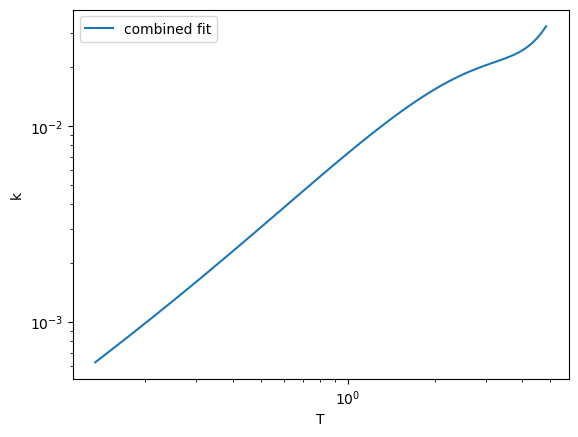

In [11]:
# big_data, data_dict = parse_raw(mat, f"lib\{mat}\RAW", plots=False)
# plot_datapoints(data_dict)
plt.plot(T, y_pred, label='combined fit')
plt.semilogx()
plt.semilogy()
plt.ylabel("k")
plt.xlabel("T")
# plt.legend(loc="center right", bbox_to_anchor=(1.1, 0.5))
plt.legend()
plt.show()

In [3]:
def get_thermal_conductivity(T_range, k_func):
    x = np.linspace(T_range[0], T_range[1], 1000)
    print(low_param)
    y = k_func(x, low_param)
    ConInt = np.trapz(y, x)
    return ConInt

In [13]:
k = get_thermal_conductivity([0.450, 0.459], func) #W/m
P = 0.0016174*k*10

[0.000249809, -0.00217074, 0.00520942, 0.00399669]


In [5]:
print(P)

3.9295268837837903e-07


In [6]:
def integrand(t, param):

    return t*np.polyval(param, t)
ConIntQuad = quad(integrand, 0.007, 0.067, low_param)

In [7]:
print(ConIntQuad[0]*0.0016174*10)

1.5176802000507042e-07
